In [2]:
import pandas as pd
import os
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from geopy.geocoders import Nominatim
import seaborn as sns

### Data Source

https://archive.sensor.community/

## 2023-12-22_sps30_sensor_65984

In [2]:
file_path_sps30_sensor_65984 = r"C:\Users\shahe\Downloads\2023-12-22_sps30_sensor_65984.csv"

In [3]:
df_sps30_sensor_65984 = pd.read_csv(file_path_sps30_sensor_65984, sep = ';')

In [4]:
df_sps30_sensor_65984.head()

sensor_id sensor_type  location     lat   lon            timestamp    P1  \
0      65984       SPS30     52748  51.112  5.88  2023-12-22T00:02:01  1.64   
1      65984       SPS30     52748  51.112  5.88  2023-12-22T00:04:27  1.88   
2      65984       SPS30     52748  51.112  5.88  2023-12-22T00:06:53  1.60   
3      65984       SPS30     52748  51.112  5.88  2023-12-22T00:09:20  1.79   
4      65984       SPS30     52748  51.112  5.88  2023-12-22T00:11:45  1.62   

     P4    P2    P0    N10     N4    N25    N1   N05    TS  
0  1.60  1.40  1.09   8.74   8.73   8.67  8.40  7.06  0.69  
1  1.83  1.61  1.26  10.12  10.11  10.05  9.74  8.20  0.69  
2  1.56  1.38  1.08   8.70   8.69   8.64  8.39  7.07  0.69  
3  1.75  1.55  1.23   9.90   9.89   9.84  9.57  8.08  0.70  
4  1.59  1.40  1.10   8.80   8.79   8.74  8.48  7.14  0.69

In [5]:
df_sps30_sensor_65984.shape

(584, 16)

In [6]:
print(df_sps30_sensor_65984['lat'].unique())
print(df_sps30_sensor_65984['lon'].unique())

[51.112]
[5.88]


In [7]:
print(df_sps30_sensor_65984['timestamp'][0])

2023-12-22T00:02:01


In [8]:
datetime_obj = pd.to_datetime(df_sps30_sensor_65984['timestamp'][0])

In [9]:
datetime_obj

Timestamp('2023-12-22 00:02:01')

In [10]:
def timestamp_to_datetime_cols(df):
    
    """ This function converts timestamp into separate year, month, day, hour, minute and seconds columns.
    
    Args:
    1- df (a dataframe)
    
    Return:
    1- df (a dataframe with new added columns for year, month, day, hour, minute and seconds)
    
    """
    
    if 'Year' in df.columns:
        return df
    else:
        df['timestamp'] = pd.to_datetime(df['timestamp'])
            
        # Extract individual components into separate columns
        df['Year'] = df['timestamp'].dt.year
        df['Month'] = df['timestamp'].dt.month
        df['Day'] = df['timestamp'].dt.day
        df['Hour'] = df['timestamp'].dt.hour
        df['Minute'] = df['timestamp'].dt.minute
        df['Second'] = df['timestamp'].dt.second
        
        df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']])
        
        
        # Change positions of columns
        column_to_move = 'Datetime'
        insert_position = 6
        # Pop the column to be moved
        col = df.pop(column_to_move)
        # Insert the column at the desired position
        df.insert(insert_position, column_to_move, col)
        
        # Change positions of columns
        column_to_move = 'Year'
        insert_position = 7
        # Pop the column to be moved
        col = df.pop(column_to_move)
        # Insert the column at the desired position
        df.insert(insert_position, column_to_move, col)
        
        # Change positions of columns
        column_to_move = 'Month'
        insert_position = 8
        # Pop the column to be moved
        col = df.pop(column_to_move)
        # Insert the column at the desired position
        df.insert(insert_position, column_to_move, col)
        
        # Change positions of columns
        column_to_move = 'Day'
        insert_position = 9
        # Pop the column to be moved
        col = df.pop(column_to_move)
        # Insert the column at the desired position
        df.insert(insert_position, column_to_move, col)
        
        # Change positions of columns
        column_to_move = 'Hour'
        insert_position = 10
        # Pop the column to be moved
        col = df.pop(column_to_move)
        # Insert the column at the desired position
        df.insert(insert_position, column_to_move, col)
        
        # Change positions of columns
        column_to_move = 'Minute'
        insert_position = 11
        # Pop the column to be moved
        col = df.pop(column_to_move)
        # Insert the column at the desired position
        df.insert(insert_position, column_to_move, col)
        
        # Change positions of columns
        column_to_move = 'Second'
        insert_position = 12
        # Pop the column to be moved
        col = df.pop(column_to_move)
        # Insert the column at the desired position
        df.insert(insert_position, column_to_move, col)
        
        
        return df
    

In [11]:
df_sps30_sensor_65984 = timestamp_to_datetime_cols(df_sps30_sensor_65984)

In [12]:
df_sps30_sensor_65984.columns

Index(['sensor_id', 'sensor_type', 'location', 'lat', 'lon', 'timestamp',
       'Datetime', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'P1',
       'P4', 'P2', 'P0', 'N10', 'N4', 'N25', 'N1', 'N05', 'TS'],
      dtype='object')

In [13]:
df_sps30_sensor_65984

sensor_id sensor_type  location     lat   lon           timestamp  \
0        65984       SPS30     52748  51.112  5.88 2023-12-22 00:02:01   
1        65984       SPS30     52748  51.112  5.88 2023-12-22 00:04:27   
2        65984       SPS30     52748  51.112  5.88 2023-12-22 00:06:53   
3        65984       SPS30     52748  51.112  5.88 2023-12-22 00:09:20   
4        65984       SPS30     52748  51.112  5.88 2023-12-22 00:11:45   
..         ...         ...       ...     ...   ...                 ...   
579      65984       SPS30     52748  51.112  5.88 2023-12-22 23:49:49   
580      65984       SPS30     52748  51.112  5.88 2023-12-22 23:52:15   
581      65984       SPS30     52748  51.112  5.88 2023-12-22 23:54:41   
582      65984       SPS30     52748  51.112  5.88 2023-12-22 23:57:06   
583      65984       SPS30     52748  51.112  5.88 2023-12-22 23:59:32   

               Datetime  Year  Month  Day  ...    P1    P4    P2    P0    N10  \
0   2023-12-22 00:02:01  2023     12   22  ...  1.64  1.60  1.40  1.09   8.74   
1   2023-12-22 00:04:27  2023     12   22  ...  1.88  1.83  1.61  1.26  10.12   
2   2023-12-22 00:06:53  2023     12   22  ...  1.60  1.56  1.38  1.08   8.70   
3   2023-12-22 00:09:20  2023     12   22  ...  1.79  1.75  1.55  1.23   9.90   
4   2023-12-22 00:11:45  2023     12   22  ...  1.62  1.59  1.40  1.10   8.80   
..                  ...   ...    ...  ...  ...   ...   ...   ...   ...    ...   
579 2023-12-22 23:49:49  2023     12   22  ...  5.07  5.07  5.05  4.76  38.01   
580 2023-12-22 23:52:15  2023     12   22  ...  5.29  5.28  5.24  4.90  39.14   
581 2023-12-22 23:54:41  2023     12   22  ...  5.40  5.39  5.34  4.99  39.82   
582 2023-12-22 23:57:06  2023     12   22  ...  5.43  5.42  5.34  4.96  39.60   
583 2023-12-22 23:59:32  2023     12   22  ...  5.31  5.30  5.23  4.87  38.89   

        N4    N25     N1    N05    TS  
0     8.73   8.67   8.40   7.06  0.69  
1    10.11  10.05   9.74   8.20  0.69  
2     8.69   8.64   8.39   7.07  0.69  
3     9.89   9.84   9.57   8.08  0.70  
4     8.79   8.74   8.48   7.14  0.69  
..     ...    ...    ...    ...   ...  
579  38.00  37.99  37.87  33.23  0.56  
580  39.14  39.11  38.96  34.14  0.58  
581  39.81  39.78  39.62  34.70  0.59  
582  39.59  39.55  39.36  34.43  0.62  
583  38.88  38.84  38.67  33.84  0.60  

[584 rows x 23 columns]

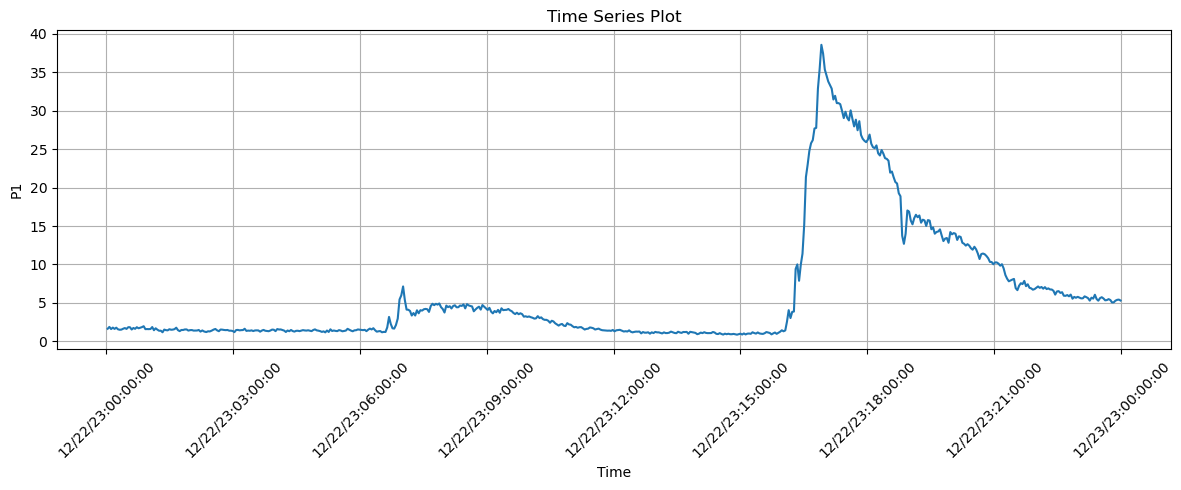

In [33]:
# Plotting time series with hour, minute, and second
plt.figure(figsize=(12, 5))
plt.plot(df_sps30_sensor_65984['Datetime'], df_sps30_sensor_65984['P1'], label='P1', linestyle='-')
plt.xlabel('Time')
plt.ylabel('P1')
plt.title('Time Series Plot')

# Format the x-axis datetime labels to show hours, minutes, and seconds
date_form = DateFormatter("%D:%H:%M:%S")  # Specify the format for hour:minute:second
plt.gca().xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
print(df_sps30_sensor_65984['lat'].unique())
print(df_sps30_sensor_65984['lon'].unique())

[51.112]
[5.88]


In [38]:
# Coordinates (latitude and longitude)
latitude = df_sps30_sensor_65984['lat'].unique()[0]
longitude = df_sps30_sensor_65984['lon'].unique()[0]

# Initialize Nominatim geocoder
geolocator = Nominatim(user_agent="geo_locator")

# Combine latitude and longitude into a single string
location = f"{latitude}, {longitude}"

# Perform reverse geocoding
try:
    address = geolocator.reverse(location)
    print(address.address)
except Exception as e:
    print("Error:", e)

Industriepad, Echt-Noord, Pey, Echt, Echt-Susteren, Limburg, Nederland, 6101 MB, Nederland


In [39]:
# Location name
location_name = "Berlin"

# Initialize Nominatim geocoder
geolocator = Nominatim(user_agent="geo_locator")

try:
    # Retrieve the location details
    location = geolocator.geocode(location_name)

    # Extract latitude and longitude
    if location:
        latitude = location.latitude
        longitude = location.longitude
        print(f"Latitude: {latitude}, Longitude: {longitude}")
    else:
        print("Location not found")
except Exception as e:
    print("Error:", e)

Latitude: 52.5170365, Longitude: 13.3888599


## 2023-12-22_sds011_sensor_26187

In [41]:
file_path_sds011_sensor_26187 = r"C:\Users\shahe\Downloads\2023-12-22_sds011_sensor_26187.csv"

In [42]:
df = pd.read_csv(file_path_sds011_sensor_26187, sep = ';')

In [43]:
df.head()

sensor_id sensor_type  location        lat      lon            timestamp  \
0      26187      SDS011     13933  51.424606  5.48461  2023-12-22T00:01:00   
1      26187      SDS011     13933  51.424606  5.48461  2023-12-22T00:03:27   
2      26187      SDS011     13933  51.424606  5.48461  2023-12-22T00:05:53   
3      26187      SDS011     13933  51.424606  5.48461  2023-12-22T00:08:19   
4      26187      SDS011     13933  51.424606  5.48461  2023-12-22T00:10:45   

     P1  durP1  ratioP1    P2  durP2  ratioP2  
0  6.70    NaN      NaN  1.27    NaN      NaN  
1  7.60    NaN      NaN  1.27    NaN      NaN  
2  6.75    NaN      NaN  1.55    NaN      NaN  
3  5.70    NaN      NaN  0.90    NaN      NaN  
4  2.55    NaN      NaN  1.00    NaN      NaN

In [44]:
df.shape

(589, 12)

In [45]:
df = timestamp_to_datetime_cols(df)

In [46]:
df.columns

Index(['sensor_id', 'sensor_type', 'location', 'lat', 'lon', 'timestamp',
       'Datetime', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'P1',
       'durP1', 'ratioP1', 'P2', 'durP2', 'ratioP2'],
      dtype='object')

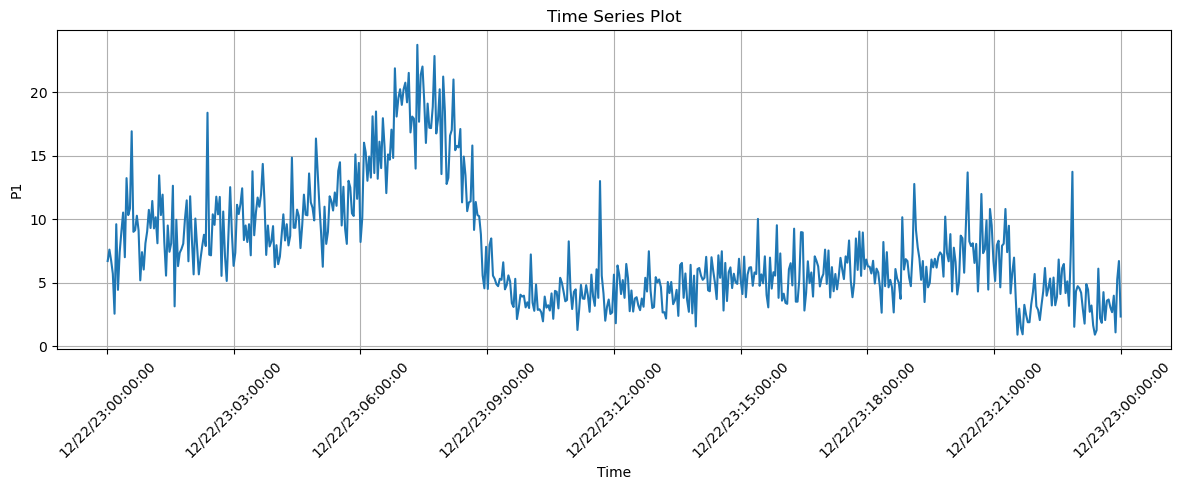

In [47]:
# Plotting time series with hour, minute, and second
plt.figure(figsize=(12, 5))
plt.plot(df['Datetime'], df['P1'], label='P1', linestyle='-')
plt.xlabel('Time')
plt.ylabel('P1')
plt.title('Time Series Plot')

# Format the x-axis datetime labels to show hours, minutes, and seconds
date_form = DateFormatter("%D:%H:%M:%S")  # Specify the format for hour:minute:second
plt.gca().xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
print(df['lat'].unique())
print(df['lon'].unique())

[51.4246058]
[5.4846101]


In [49]:
# Coordinates (latitude and longitude)
latitude = df['lat'].unique()[0]
longitude = df['lon'].unique()[0]

# Initialize Nominatim geocoder
geolocator = Nominatim(user_agent="geo_locator")

# Combine latitude and longitude into a single string
location = f"{latitude}, {longitude}"

# Perform reverse geocoding
try:
    address = geolocator.reverse(location)
    print(address.address)
except Exception as e:
    print("Error:", e)

81, Le Sage ten Broeklaan, Looiakkers, Stratum, Eindhoven, Noord-Brabant, Nederland, 5615 CR, Nederland


## 2023-12-22_bme280_sensor_804

In [50]:
file_path_bme280_sensor_804 = r"C:\Users\shahe\Downloads\2023-12-22_bme280_sensor_804.csv"

In [53]:
df = pd.read_csv(file_path_bme280_sensor_804, sep = ';')

In [54]:
df.head()

sensor_id sensor_type  location     lat   lon            timestamp  \
0        804      BME280     25687  49.976  8.24  2023-12-22T00:01:05   
1        804      BME280     25687  49.976  8.24  2023-12-22T00:03:30   
2        804      BME280     25687  49.976  8.24  2023-12-22T00:05:55   
3        804      BME280     25687  49.976  8.24  2023-12-22T00:08:21   
4        804      BME280     25687  49.976  8.24  2023-12-22T00:10:46   

   pressure  altitude  pressure_sealevel  temperature  humidity  
0  98751.66       NaN                NaN         3.62     100.0  
1  98740.88       NaN                NaN         3.57     100.0  
2  98739.75       NaN                NaN         3.63     100.0  
3  98736.25       NaN                NaN         3.65     100.0  
4  98758.38       NaN                NaN         3.63     100.0

In [55]:
df.shape

(586, 11)

In [56]:
df = timestamp_to_datetime_cols(df)

In [57]:
df.columns

Index(['sensor_id', 'sensor_type', 'location', 'lat', 'lon', 'timestamp',
       'Datetime', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second',
       'pressure', 'altitude', 'pressure_sealevel', 'temperature', 'humidity'],
      dtype='object')

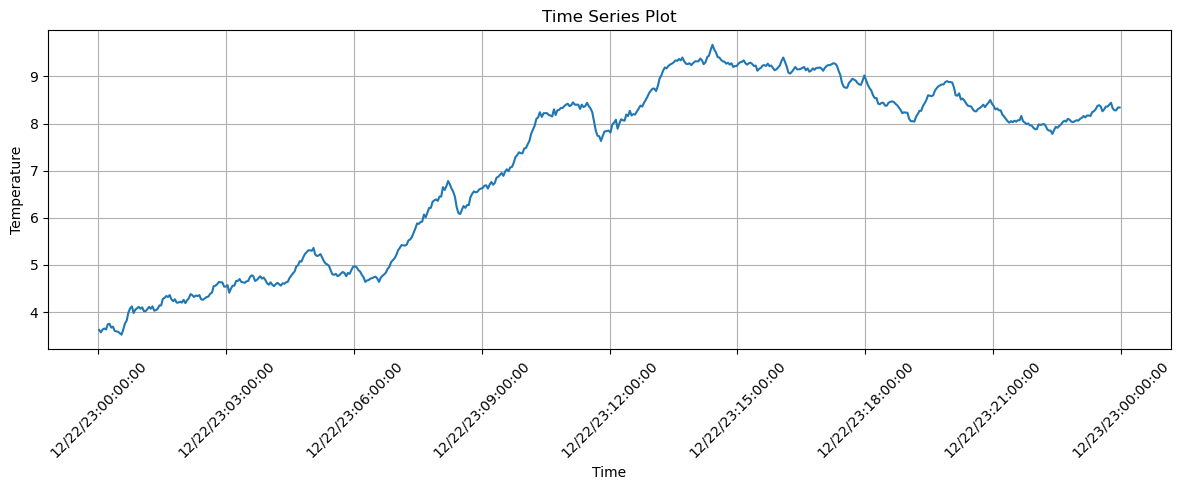

In [58]:
# Plotting time series with hour, minute, and second
plt.figure(figsize=(12, 5))
plt.plot(df['Datetime'], df['temperature'], label='temperature', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Time Series Plot')

# Format the x-axis datetime labels to show hours, minutes, and seconds
date_form = DateFormatter("%D:%H:%M:%S")  # Specify the format for hour:minute:second
plt.gca().xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
print(df['lat'].unique())
print(df['lon'].unique())

[49.976]
[8.24]


In [61]:
# Coordinates (latitude and longitude)
latitude = df['lat'].unique()[0]
longitude = df['lon'].unique()[0]

# Initialize Nominatim geocoder
geolocator = Nominatim(user_agent="geo_locator")

# Combine latitude and longitude into a single string
location = f"{latitude}, {longitude}"

# Perform reverse geocoding
try:
    address = geolocator.reverse(location)
    print(address.address)
except Exception as e:
    print("Error:", e)

87a, Hans-Böckler-Straße, Bretzenheim, Mainz, Rheinland-Pfalz, 55128, Deutschland


# 

https://aqicn.org/data-platform/register/

In [182]:
file_path_munich_air_quality = r"C:\Users\shahe\Downloads\munich-air-quality.csv"

In [183]:
df = pd.read_csv(file_path_munich_air_quality, sep = ',')

In [184]:
df.head()

date  pm25  pm10   o3  no2  so2  co
0  2023/12/1    56    17   16   17         
1  2023/12/2    56    18   16   22         
2  2023/12/3    56    27    5   31         
3  2023/12/4    75    26   21   34         
4  2023/12/5    39    18   19   25

In [185]:
df['date'] = pd.to_datetime(df['date'])

In [186]:
df = df.sort_values(by = 'date', ascending = True)
df.reset_index(inplace = True, drop = True)

In [187]:
df.head()

date  pm25  pm10   o3  no2  so2  co
0 2014-08-13          15                   
1 2014-08-14          15                   
2 2014-08-15          14   20   41    2    
3 2014-08-16           9   35   33    1    
4 2014-08-17          10   33   45    4

In [188]:
df.columns

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')

In [189]:
# Remove spaces from column names
df.rename(columns=lambda x: x.replace(' ', ''), inplace=True)

In [190]:
df.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

In [191]:
# Convert specific columns to numeric
df['pm25'] = pd.to_numeric(df['pm25'], errors='coerce')
df['pm10'] = pd.to_numeric(df['pm10'], errors='coerce')
df['o3'] = pd.to_numeric(df['o3'], errors='coerce')
df['no2'] = pd.to_numeric(df['no2'], errors='coerce')
df['so2'] = pd.to_numeric(df['so2'], errors='coerce')
df['co'] = pd.to_numeric(df['co'], errors='coerce')

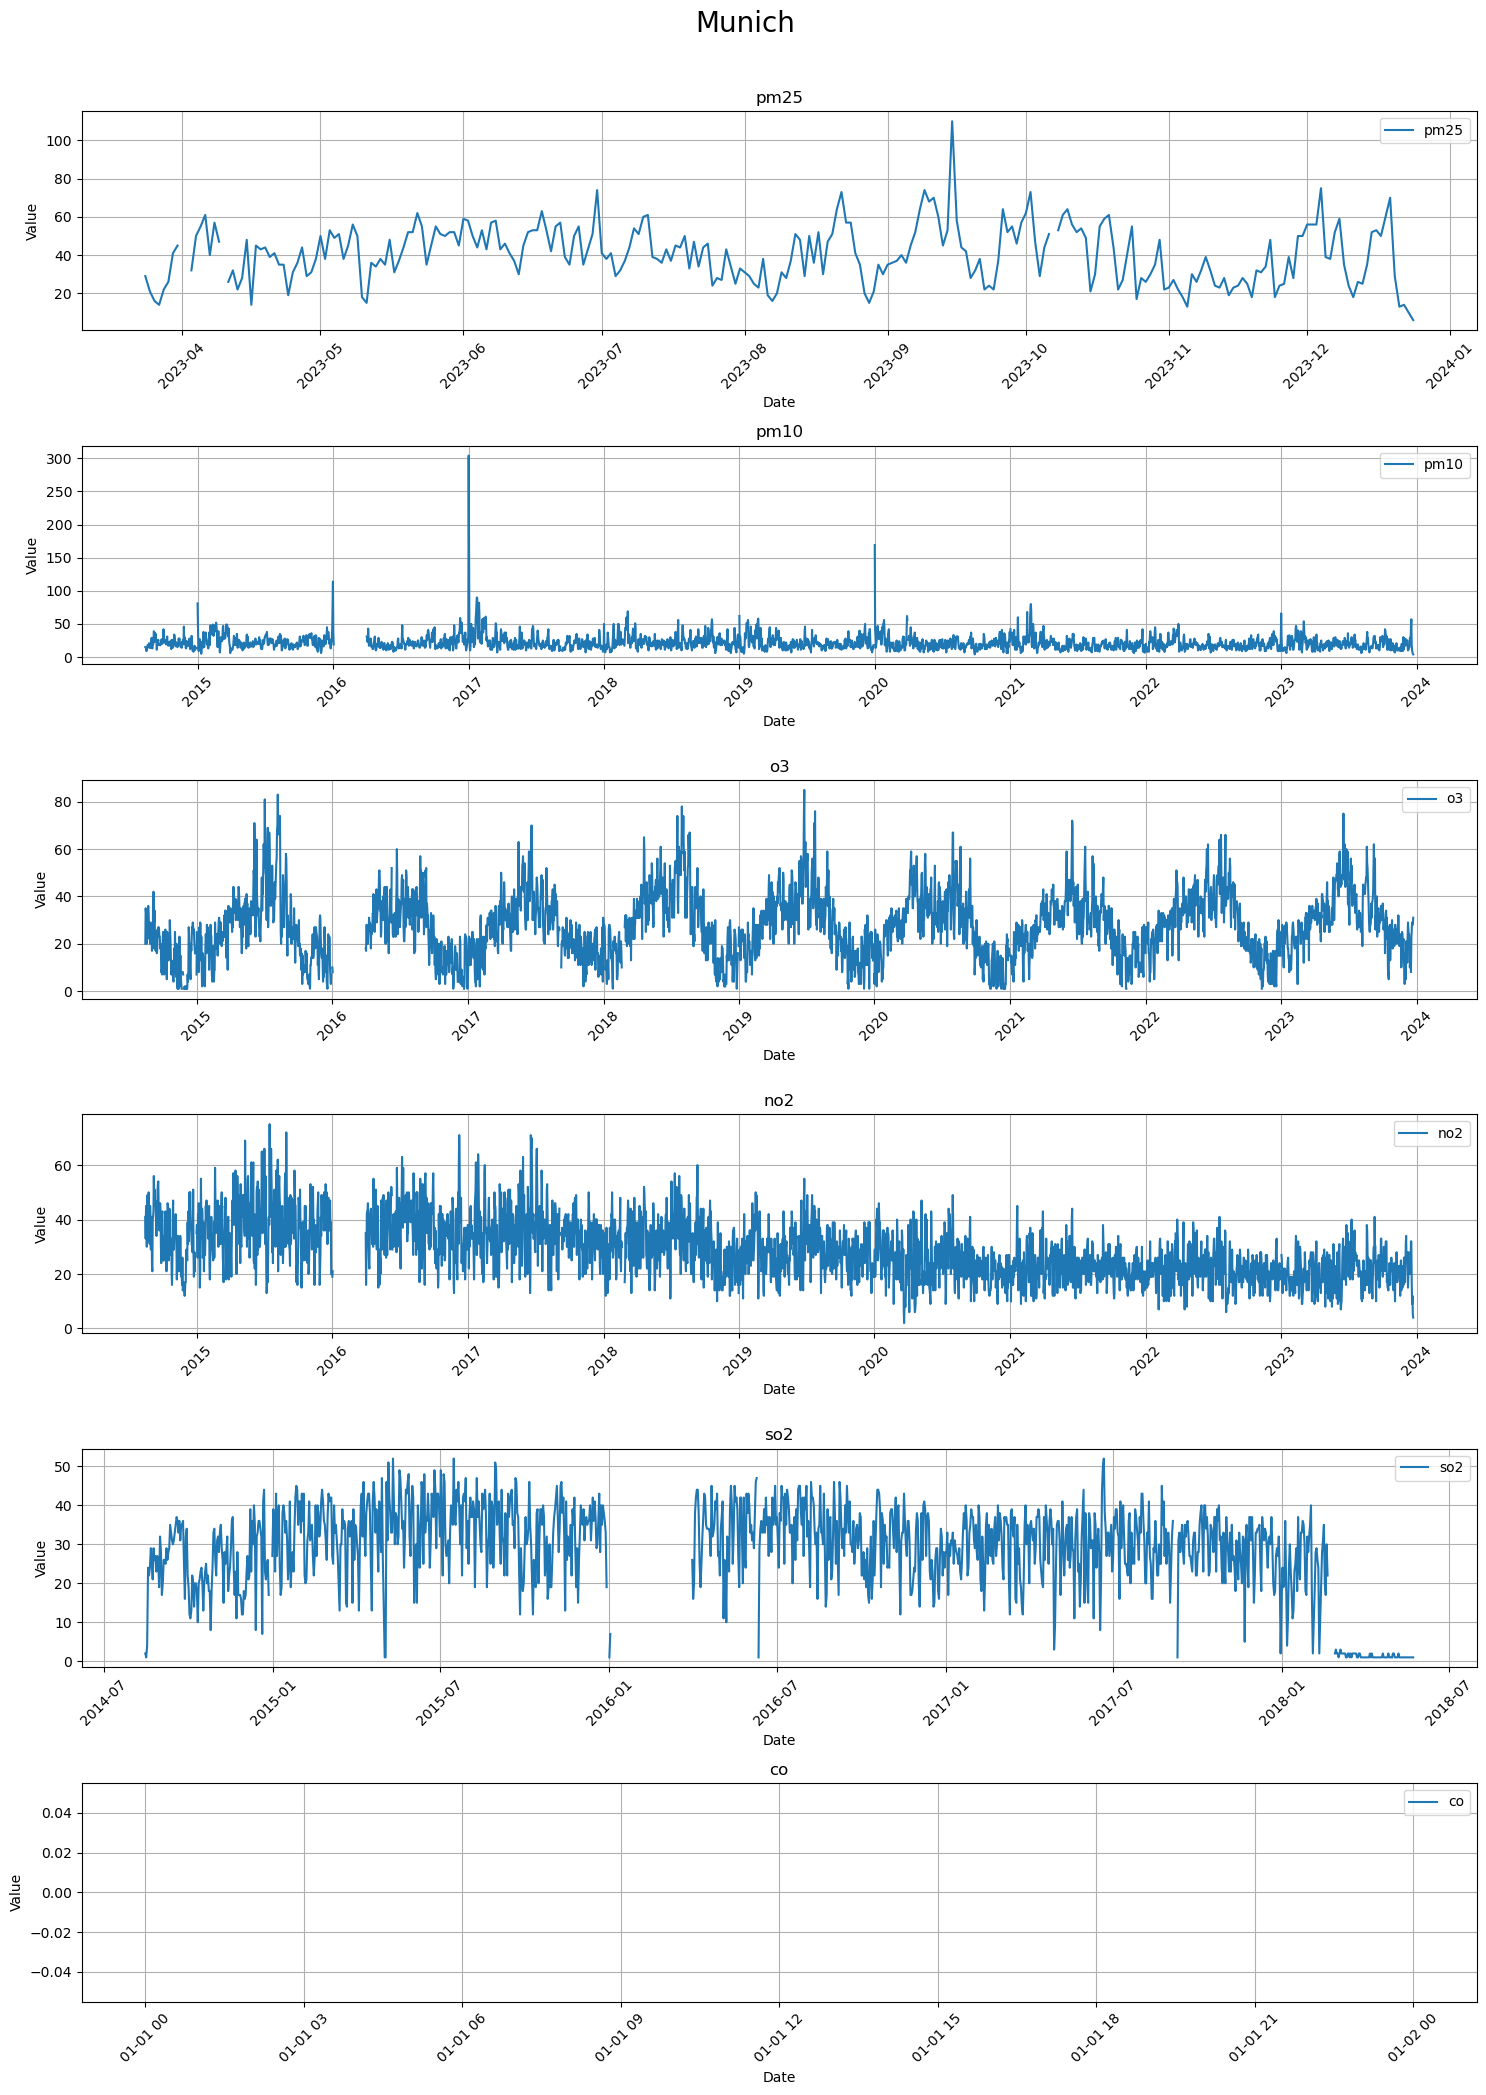

In [202]:
list_cols = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
# Number of subplots
num_subplots = len(list_cols)

# Create subplots using a for loop
fig, ax = plt.subplots(num_subplots, 1, figsize=(15, 22))

# Loop through subplots and plot data
for count, name in enumerate(list_cols):
    
    ax[count].plot(df['date'], df[name], label=name, linestyle='-')
    ax[count].set_ylabel('Value')
    ax[count].legend()
    
    ax[count].set_xlabel('Date')
    ax[count].set_title(f'{name}')
    ax[count].tick_params(axis='x', rotation=45)
    ax[count].legend()
    ax[count].grid(True)
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Munich', fontsize = 20)
plt.show()


In [203]:
file_path_berlin_air_quality = r"C:\Users\shahe\Downloads\berlin,-germany-air-quality.csv"

In [204]:
df = pd.read_csv(file_path_berlin_air_quality, sep = ',')

In [205]:
df.head()

date  pm25  pm10   o3  no2  co
0  2023/12/1    71    20   11   14    
1  2023/12/2    64    20   11   13    
2  2023/12/3    64    28    7   20    
3  2023/12/4    76    37   10   21    
4  2023/12/5    96    43    7   22

In [206]:
df['date'] = pd.to_datetime(df['date'])

In [207]:
df = df.sort_values(by = 'date', ascending = True)
df.reset_index(inplace = True, drop = True)

In [208]:
df.head()

date  pm25  pm10   o3  no2  co
0 2014-08-19               22   23    
1 2014-08-20          20   28   35    
2 2014-08-21          23   30   44    
3 2014-08-22          38   31   27    
4 2014-08-23          21   28   19

In [209]:
df.columns

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' co'], dtype='object')

In [210]:
# Remove spaces from column names
df.rename(columns=lambda x: x.replace(' ', ''), inplace=True)

In [211]:
df.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'co'], dtype='object')

In [212]:
# Convert specific columns to numeric
df['pm25'] = pd.to_numeric(df['pm25'], errors='coerce')
df['pm10'] = pd.to_numeric(df['pm10'], errors='coerce')
df['o3'] = pd.to_numeric(df['o3'], errors='coerce')
df['no2'] = pd.to_numeric(df['no2'], errors='coerce')
df['co'] = pd.to_numeric(df['co'], errors='coerce')

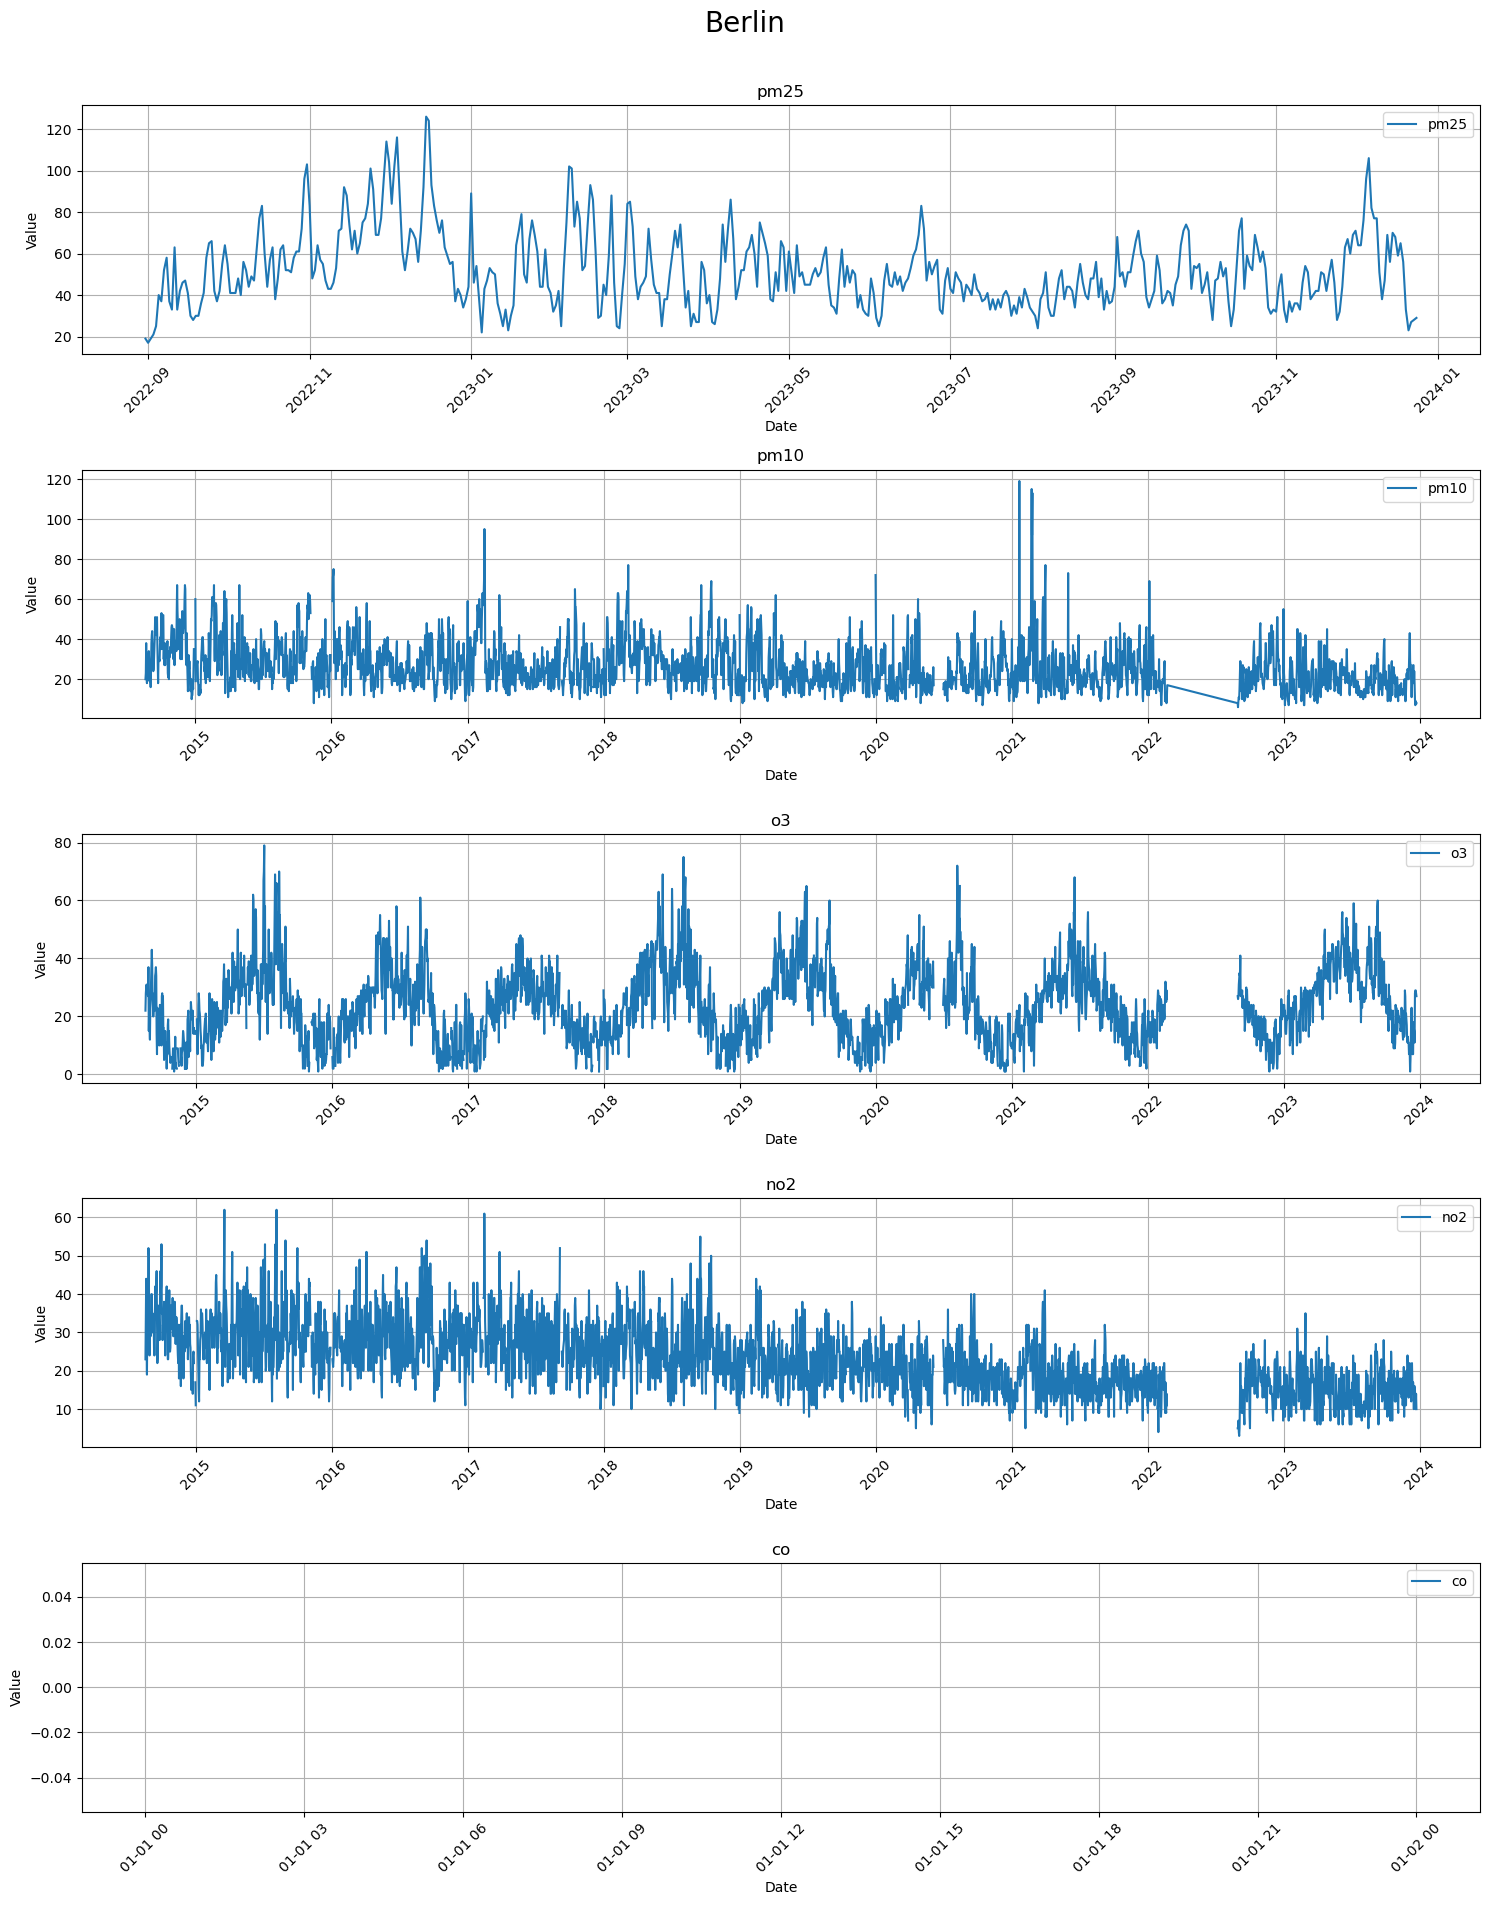

In [215]:
list_cols = ['pm25', 'pm10', 'o3', 'no2', 'co']
# Number of subplots
num_subplots = len(list_cols)

# Create subplots using a for loop
fig, ax = plt.subplots(num_subplots, 1, figsize=(15, 20))

# Loop through subplots and plot data
for count, name in enumerate(list_cols):
    
    ax[count].plot(df['date'], df[name], label=name, linestyle='-')
    ax[count].set_ylabel('Value')
    ax[count].legend()
    
    ax[count].set_xlabel('Date')
    ax[count].set_title(f'{name}')
    ax[count].tick_params(axis='x', rotation=45)
    ax[count].legend()
    ax[count].grid(True)
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Berlin', fontsize = 20)
plt.show()


In [218]:
file_path_ukraine_air_quality = r"C:\Users\shahe\Downloads\steeldrum,-lviv, ukraine-air-quality.csv"

In [219]:
df = pd.read_csv(file_path_ukraine_air_quality, sep = ',')

In [220]:
df.head()

date  pm25  pm10
0  2022/4/1    57    13
1  2022/4/2    36    15
2  2022/4/3    39    19
3  2022/4/4    44    24
4  2022/4/5    63    14

In [221]:
df['date'] = pd.to_datetime(df['date'])

In [222]:
df = df.sort_values(by = 'date', ascending = True)
df.reset_index(inplace = True, drop = True)

In [223]:
df.head()

date  pm25  pm10
0 2019-05-24          21
1 2019-05-25    52      
2 2019-05-27          18
3 2019-05-28    45    18
4 2019-05-29    43    23

In [224]:
df.columns

Index(['date', ' pm25', ' pm10'], dtype='object')

In [225]:
# Remove spaces from column names
df.rename(columns=lambda x: x.replace(' ', ''), inplace=True)

In [226]:
df.columns

Index(['date', 'pm25', 'pm10'], dtype='object')

In [227]:
# Convert specific columns to numeric
df['pm25'] = pd.to_numeric(df['pm25'], errors='coerce')
df['pm10'] = pd.to_numeric(df['pm10'], errors='coerce')

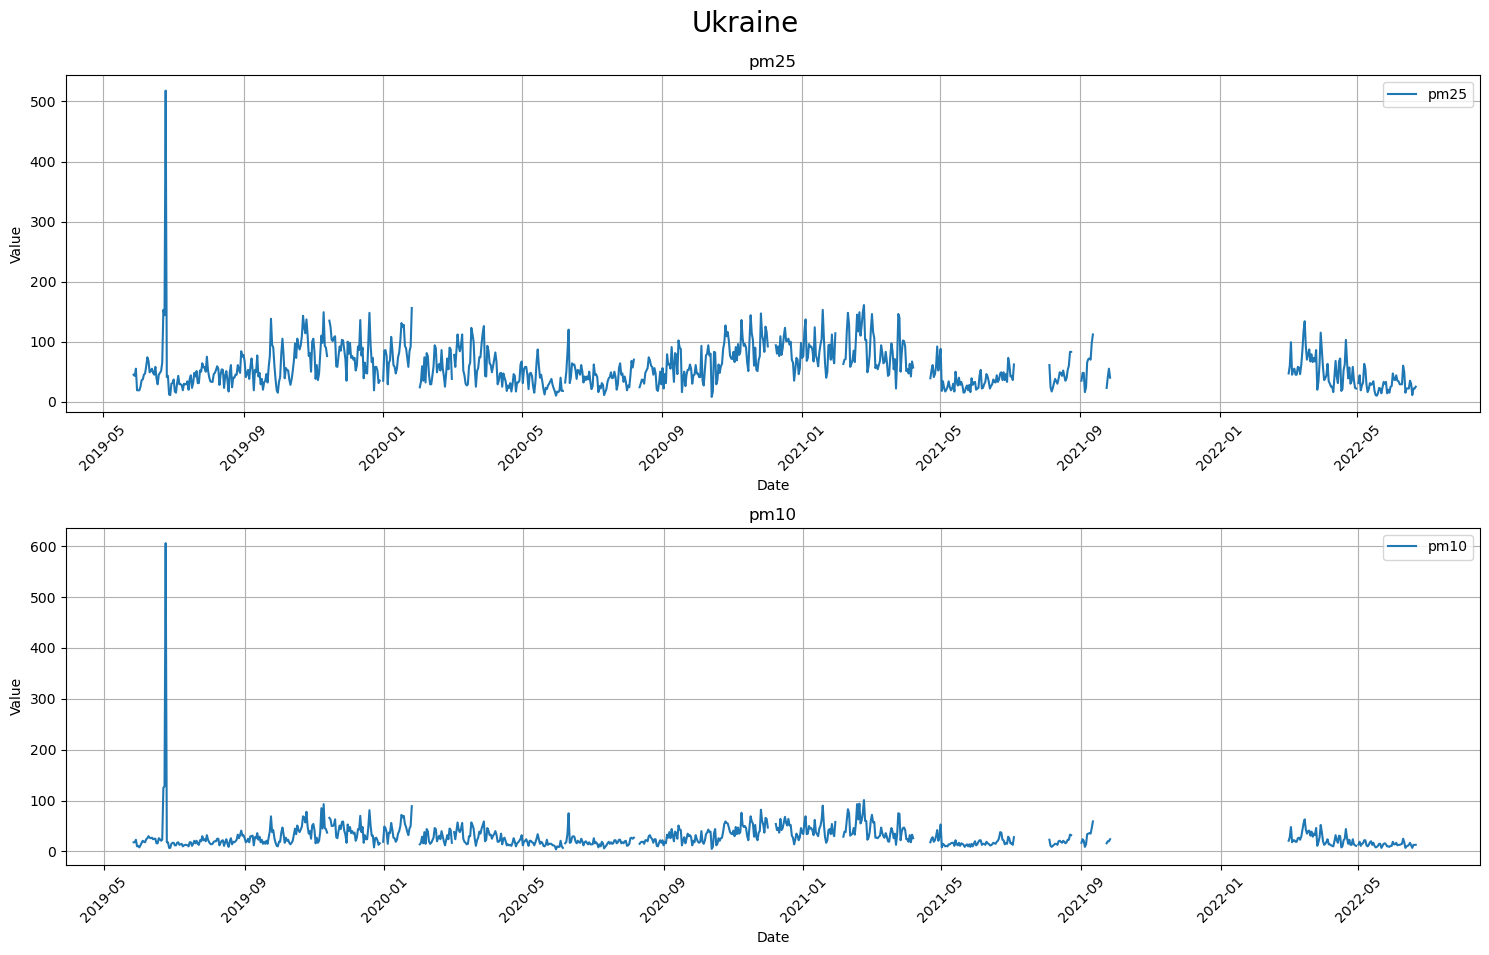

In [229]:
list_cols = ['pm25', 'pm10']
# Number of subplots
num_subplots = len(list_cols)

# Create subplots using a for loop
fig, ax = plt.subplots(num_subplots, 1, figsize=(15, 10))

# Loop through subplots and plot data
for count, name in enumerate(list_cols):
    
    ax[count].plot(df['date'], df[name], label=name, linestyle='-')
    ax[count].set_ylabel('Value')
    ax[count].legend()
    
    ax[count].set_xlabel('Date')
    ax[count].set_title(f'{name}')
    ax[count].tick_params(axis='x', rotation=45)
    ax[count].legend()
    ax[count].grid(True)
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Ukraine', fontsize = 20)
plt.show()


In [230]:
file_path_ukraine_air_quality = r"C:\Users\shahe\Downloads\tayrova,-odessa, ukraine-air-quality.csv"

In [231]:
df = pd.read_csv(file_path_ukraine_air_quality, sep = ',')

In [232]:
df.head()

date  pm25  pm10
0  2021/7/1    29    11
1  2021/7/2    36    11
2  2021/7/3    44    12
3  2021/7/4    47    13
4  2021/7/5    46    14

In [233]:
df['date'] = pd.to_datetime(df['date'])

In [234]:
df = df.sort_values(by = 'date', ascending = True)
df.reset_index(inplace = True, drop = True)

In [235]:
df.head()

date  pm25  pm10
0 2019-04-05           1
1 2019-04-06     3     1
2 2019-04-07     5    13
3 2019-04-08    38    16
4 2019-04-09    41    32

In [236]:
df.columns

Index(['date', ' pm25', ' pm10'], dtype='object')

In [237]:
# Remove spaces from column names
df.rename(columns=lambda x: x.replace(' ', ''), inplace=True)

In [238]:
df.columns

Index(['date', 'pm25', 'pm10'], dtype='object')

In [239]:
# Convert specific columns to numeric
df['pm25'] = pd.to_numeric(df['pm25'], errors='coerce')
df['pm10'] = pd.to_numeric(df['pm10'], errors='coerce')

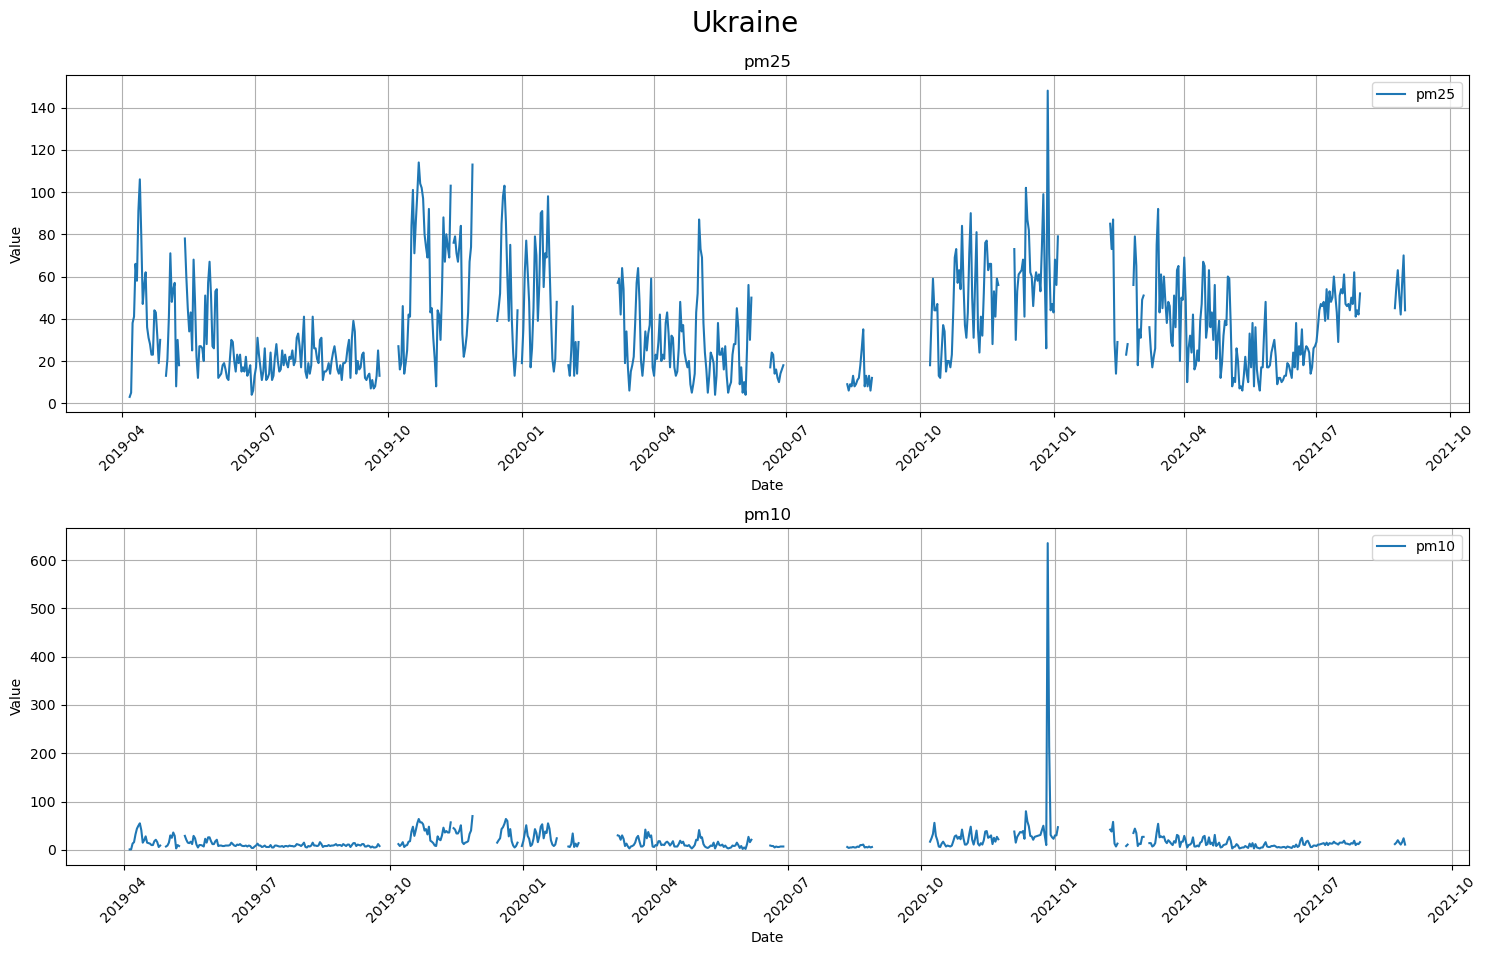

In [240]:
list_cols = ['pm25', 'pm10']
# Number of subplots
num_subplots = len(list_cols)

# Create subplots using a for loop
fig, ax = plt.subplots(num_subplots, 1, figsize=(15, 10))

# Loop through subplots and plot data
for count, name in enumerate(list_cols):
    
    ax[count].plot(df['date'], df[name], label=name, linestyle='-')
    ax[count].set_ylabel('Value')
    ax[count].legend()
    
    ax[count].set_xlabel('Date')
    ax[count].set_title(f'{name}')
    ax[count].tick_params(axis='x', rotation=45)
    ax[count].legend()
    ax[count].grid(True)
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Ukraine', fontsize = 20)
plt.show()


# WHO

In [241]:
file_path = r"C:\Users\shahe\Downloads\TechLabs CodeAtHome Bootcamp 2023\TechLabs_WHO\\"
filename = "who_aap_2021_v9_11august2022.xlsx"

In [245]:
df = pd.read_excel(os.path.join(file_path, filename ), sheet_name = 'AAP_2022_city_v9')

In [246]:
df.head()

WHO Region ISO3 WHO Country Name City or Locality  \
0  Eastern Mediterranean Region  AFG      Afghanistan            Kabul   
1               European Region  ALB          Albania           Durres   
2               European Region  ALB          Albania           Durres   
3               European Region  ALB          Albania          Elbasan   
4               European Region  ALB          Albania          Elbasan   

   Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m3)  \
0              2019         119.77           NaN          NaN   
1              2015            NaN         17.65        26.63   
2              2016          14.32         24.56        24.78   
3              2015            NaN           NaN        23.96   
4              2016            NaN           NaN        26.26   

   PM25 temporal coverage (%)  PM10 temporal coverage (%)  \
0                        18.0                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

   NO2 temporal coverage (%)  \
0                        NaN   
1                  83.961187   
2                  87.932605   
3                  97.853881   
4                  96.049636   

                                           Reference  \
0  U.S. Department of State, United States Enviro...   
1   European Environment Agency (downloaded in 2021)   
2   European Environment Agency (downloaded in 2021)   
3   European Environment Agency (downloaded in 2021)   
4   European Environment Agency (downloaded in 2021)   

  Number and type of monitoring stations  Version of the database  Status  
0                                    NaN                     2022     NaN  
1                                    NaN                     2022     NaN  
2                                    NaN                     2022     NaN  
3                                    NaN                     2022     NaN  
4                                    NaN                     2022     NaN

In [247]:
df.shape

(32191, 15)

In [248]:
df.columns

Index(['WHO Region', 'ISO3', 'WHO Country Name', 'City or Locality',
       'Measurement Year', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
       'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)',
       'NO2 temporal coverage (%)', 'Reference',
       'Number and type of monitoring stations', 'Version of the database',
       'Status'],
      dtype='object')

In [249]:
# Summary statistics of numeric columns
print(df.describe())

       Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)   NO2 (μg/m3)  \
count      32191.000000   15048.000000  21109.000000  22200.000000   
mean        2015.579354      22.920320     30.533252     20.619336   
std            2.752654      17.925906     29.312756     12.133388   
min         2000.000000       0.010000      1.040000      0.000000   
25%         2014.000000      10.350000     16.980000     12.000000   
50%         2016.000000      16.000000     22.000000     18.800000   
75%         2018.000000      31.000000     31.300000     27.160000   
max         2021.000000     191.900000    540.000000    210.680000   

       PM25 temporal coverage (%)  PM10 temporal coverage (%)  \
count                 7275.000000                 5381.000000   
mean                    90.794096                   90.583500   
std                     14.872681                   13.816311   
min                      0.000000                    2.568493   
25%                     88.595890           

In [250]:
# Information about the DataFrame (data types, non-null values)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32191 entries, 0 to 32190
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   WHO Region                              32190 non-null  object 
 1   ISO3                                    32191 non-null  object 
 2   WHO Country Name                        32191 non-null  object 
 3   City or Locality                        32191 non-null  object 
 4   Measurement Year                        32191 non-null  int64  
 5   PM2.5 (μg/m3)                           15048 non-null  float64
 6   PM10 (μg/m3)                            21109 non-null  float64
 7   NO2 (μg/m3)                             22200 non-null  float64
 8   PM25 temporal coverage (%)              7275 non-null   float64
 9   PM10 temporal coverage (%)              5381 non-null   float64
 10  NO2 temporal coverage (%)               19890 non-null  fl

In [251]:
# Check for missing values
print(df.isnull().sum())

WHO Region                                    1
ISO3                                          0
WHO Country Name                              0
City or Locality                              0
Measurement Year                              0
PM2.5 (μg/m3)                             17143
PM10 (μg/m3)                              11082
NO2 (μg/m3)                                9991
PM25 temporal coverage (%)                24916
PM10 temporal coverage (%)                26810
NO2 temporal coverage (%)                 12301
Reference                                     5
Number and type of monitoring stations    23433
Version of the database                       0
Status                                    32191
dtype: int64


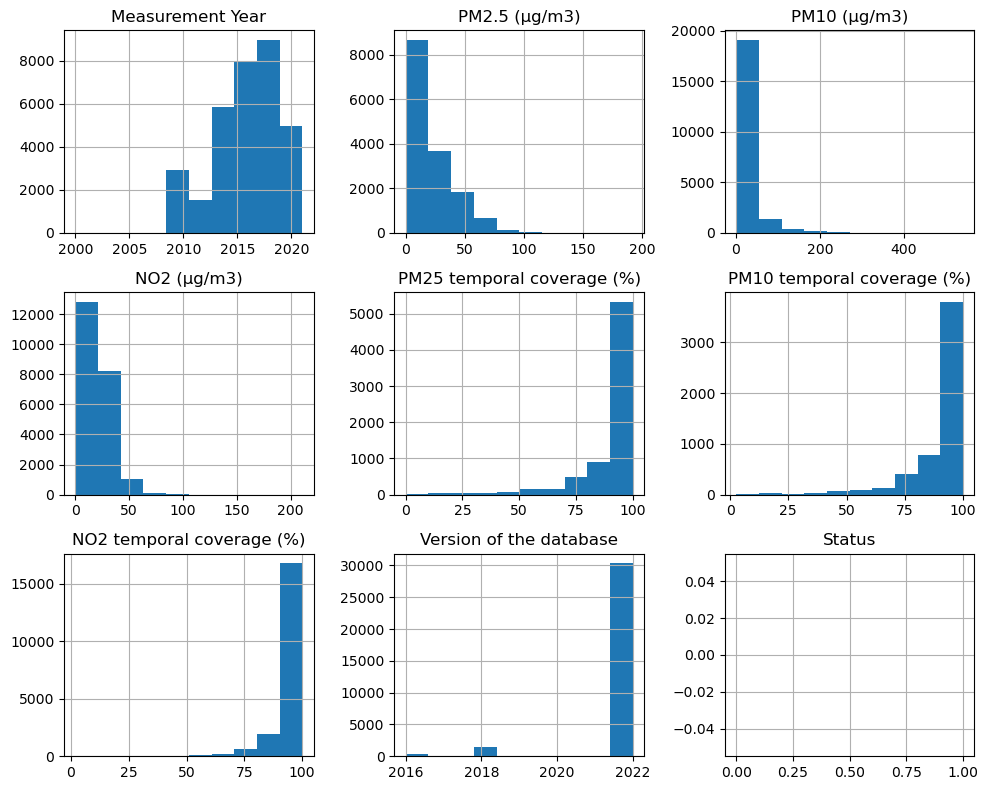

In [253]:
# Histograms for numeric columns
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

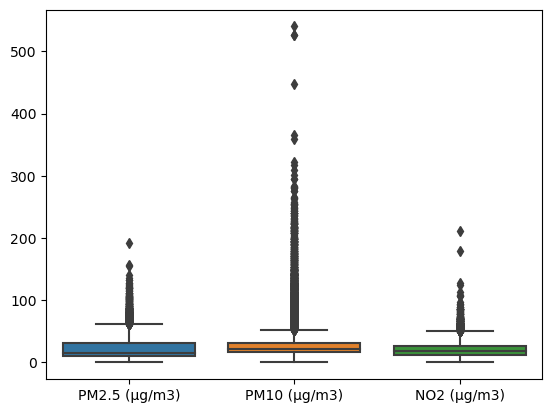

In [254]:
# Boxplots to visualize distributions and outliers
sns.boxplot(data=df[['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)']])
plt.show()


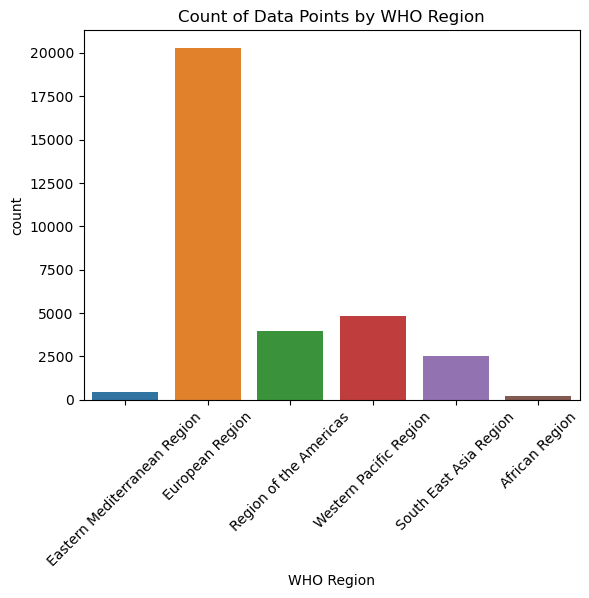

In [257]:
# Count of data points for each WHO Region
sns.countplot(x='WHO Region', data=df)
plt.title('Count of Data Points by WHO Region')
plt.xticks(rotation=45)
plt.show()

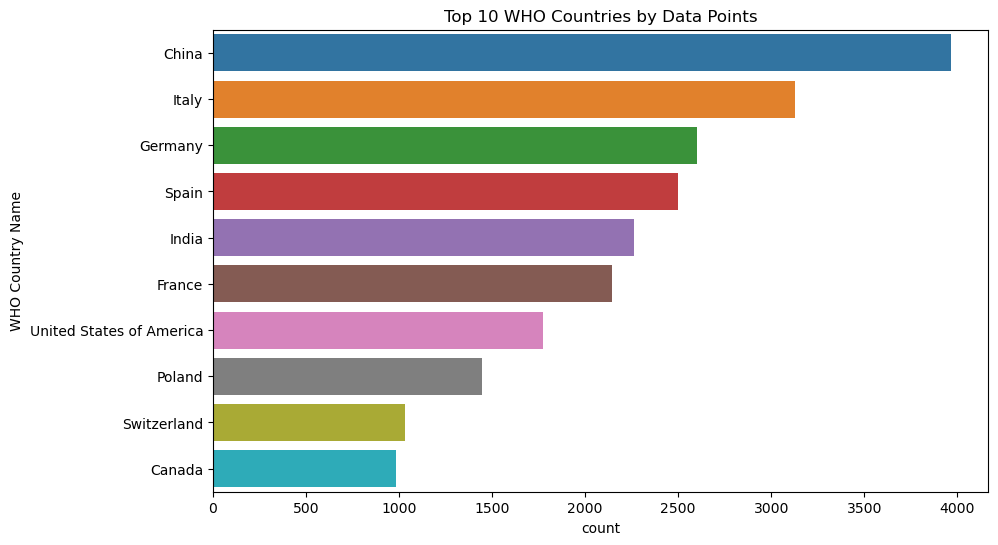

In [258]:
# Bar plot for WHO Country Name
plt.figure(figsize=(10, 6))
sns.countplot(y='WHO Country Name', data=df, order=df['WHO Country Name'].value_counts().index[:10])
plt.title('Top 10 WHO Countries by Data Points')
plt.show()

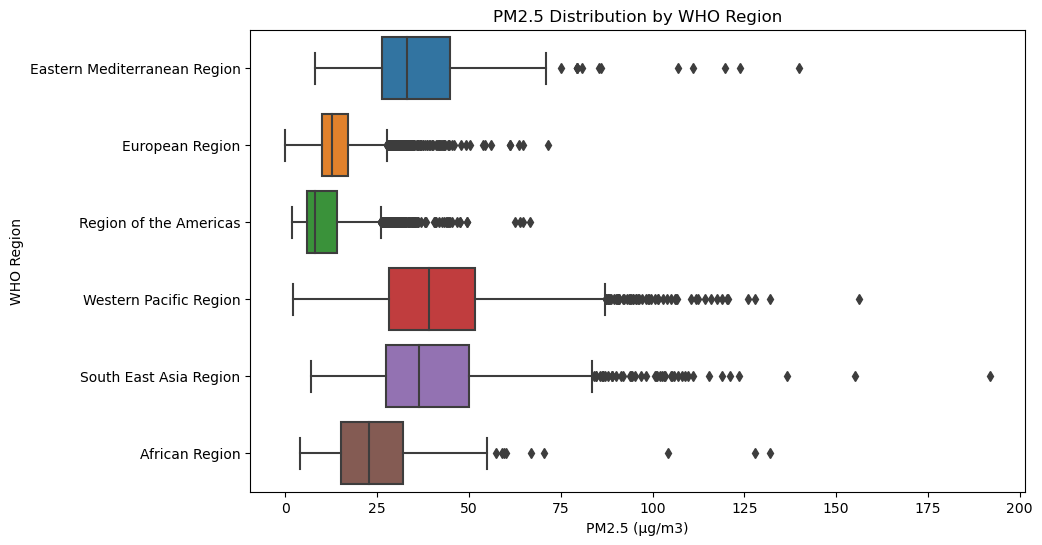

C:\Users\shahe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


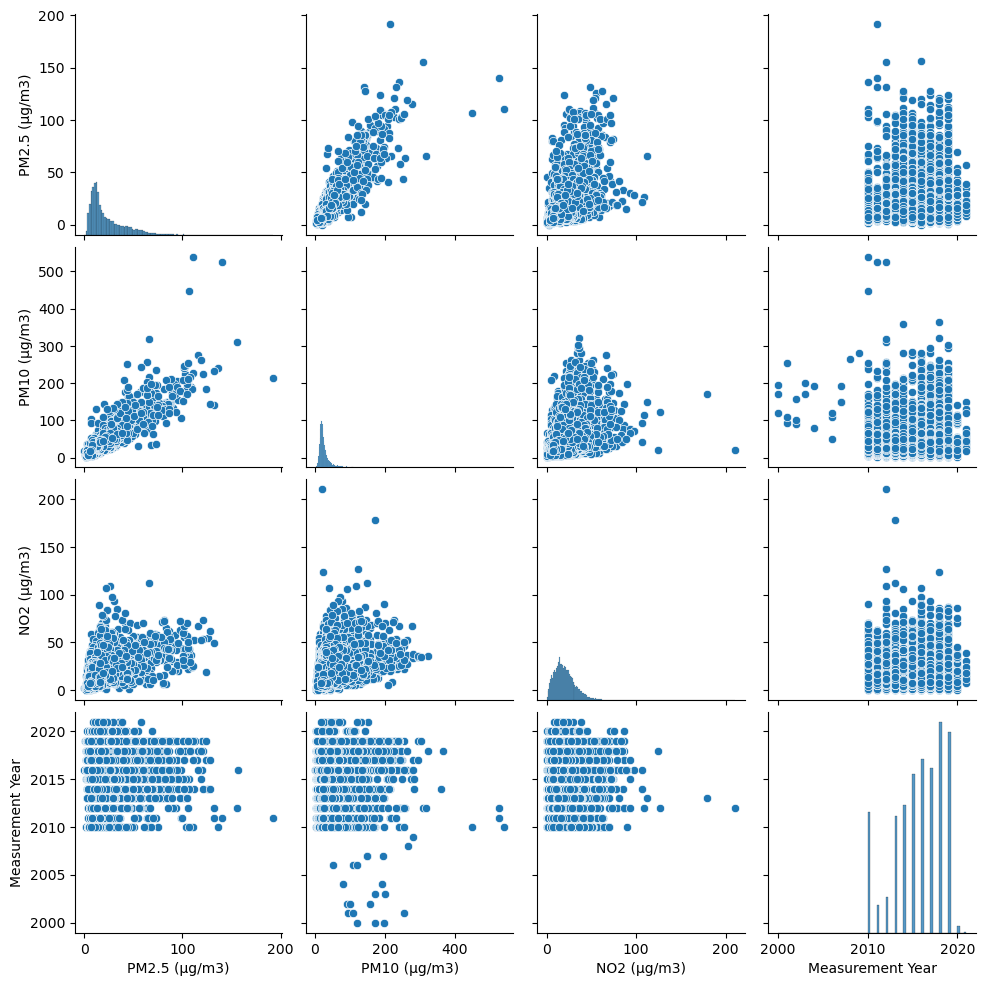

In [260]:
# Boxplots for PM2.5, PM10, and NO2 by WHO Region
plt.figure(figsize=(10, 6))
sns.boxplot(x='PM2.5 (μg/m3)', y='WHO Region', data=df)
plt.title('PM2.5 Distribution by WHO Region')
plt.show()

# Pairplot for numeric columns
sns.pairplot(df[['PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)', 'Measurement Year']])
plt.show()

In [265]:
df['WHO Country Name'].unique()

array(['Afghanistan', 'Albania', 'Andorra', 'United Arab Emirates',
       'Argentina', 'Australia', 'Austria', 'Belgium', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Bolivia (Plurinational State of)', 'Brazil', 'Bhutan', 'Canada',
       'Switzerland', 'Chile', 'China', 'Cameroon', 'Colombia',
       'Costa Rica', 'Cuba', 'Cyprus', 'Czechia', 'Germany', 'Denmark',
       'Algeria', 'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'France', 'United Kingdom', 'Georgia', 'Ghana',
       'Greece', 'Guatemala', 'Honduras', 'Croatia', 'Hungary',
       'Indonesia', 'India', 'Ireland', 'Iran (Islamic Republic of)',
       'Iraq', 'Iceland', 'Israel', 'Italy', 'Jamaica', 'Jordan', 'Japan',
       'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Republic of Korea', 'Kuwait',
       "Lao People's Democratic Republic", 'Lebanon', 'Liechtenstein',
       'Sri Lanka', 'Lithuania', 'Luxembourg', 'Latvia', 'Morocco',
       'Monaco', 'Ma

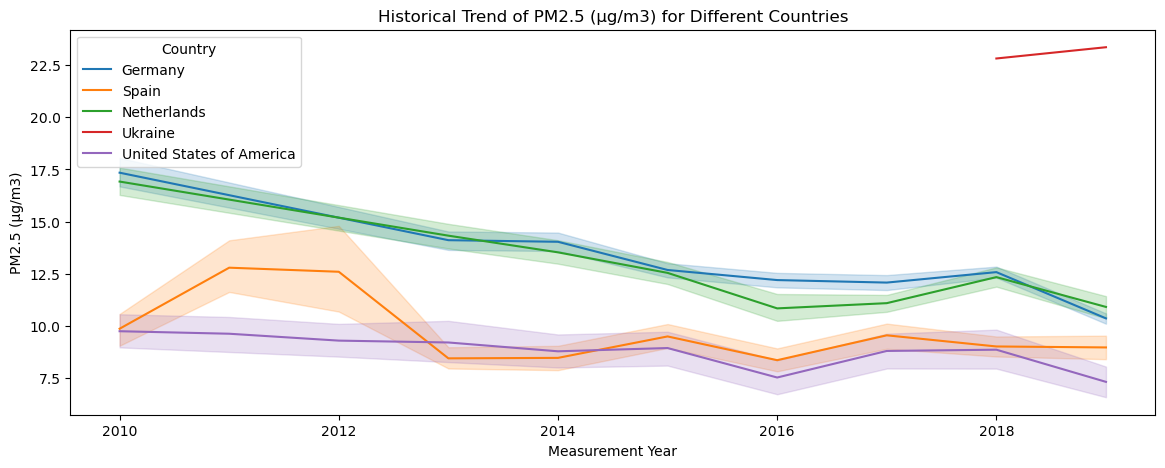

In [272]:
# Filter data for PM2.5 values and countries of interest
countries_of_interest = ['United States of America','Spain', 'Germany', 'Ukraine', 'Netherlands']  # Replace with your countries
pollutant = 'PM2.5 (μg/m3)'  # Replace with the pollutant of interest

filtered_data = df[df['WHO Country Name'].isin(countries_of_interest)]

# Plotting historical trend for PM2.5 for different countries
plt.figure(figsize=(14, 5))
sns.lineplot(x='Measurement Year', y=pollutant, hue='WHO Country Name', data=filtered_data)
plt.title(f'Historical Trend of {pollutant} for Different Countries')
plt.xlabel('Measurement Year')
plt.ylabel(f'{pollutant}')
plt.legend(title='Country')
plt.show()

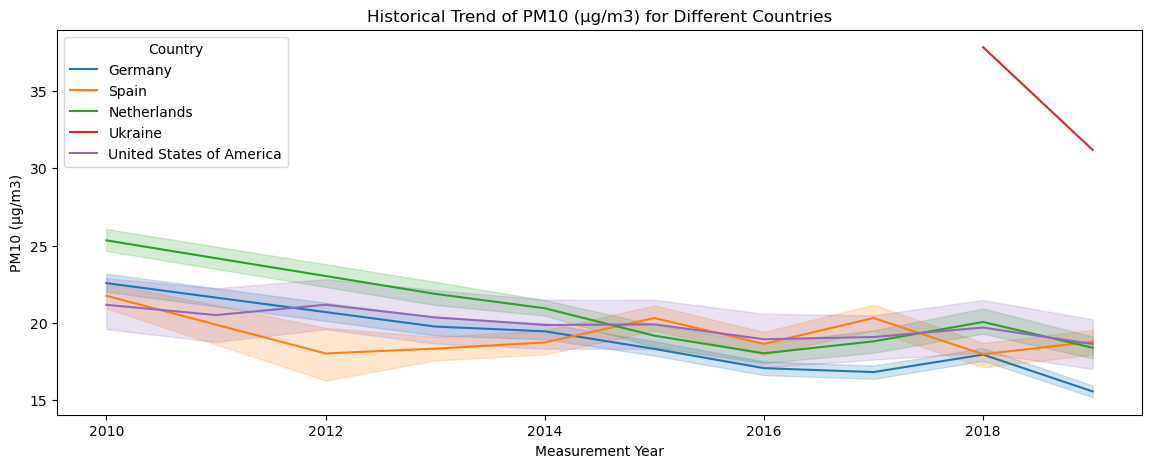

In [273]:
# Filter data for PM2.5 values and countries of interest
countries_of_interest = ['United States of America','Spain', 'Germany', 'Ukraine', 'Netherlands']  # Replace with your countries
pollutant = 'PM10 (μg/m3)'  # Replace with the pollutant of interest

filtered_data = df[df['WHO Country Name'].isin(countries_of_interest)]

# Plotting historical trend for PM2.5 for different countries
plt.figure(figsize=(14, 5))
sns.lineplot(x='Measurement Year', y=pollutant, hue='WHO Country Name', data=filtered_data)
plt.title(f'Historical Trend of {pollutant} for Different Countries')
plt.xlabel('Measurement Year')
plt.ylabel(f'{pollutant}')
plt.legend(title='Country')
plt.show()

In [275]:
df.columns

Index(['WHO Region', 'ISO3', 'WHO Country Name', 'City or Locality',
       'Measurement Year', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
       'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)',
       'NO2 temporal coverage (%)', 'Reference',
       'Number and type of monitoring stations', 'Version of the database',
       'Status'],
      dtype='object')

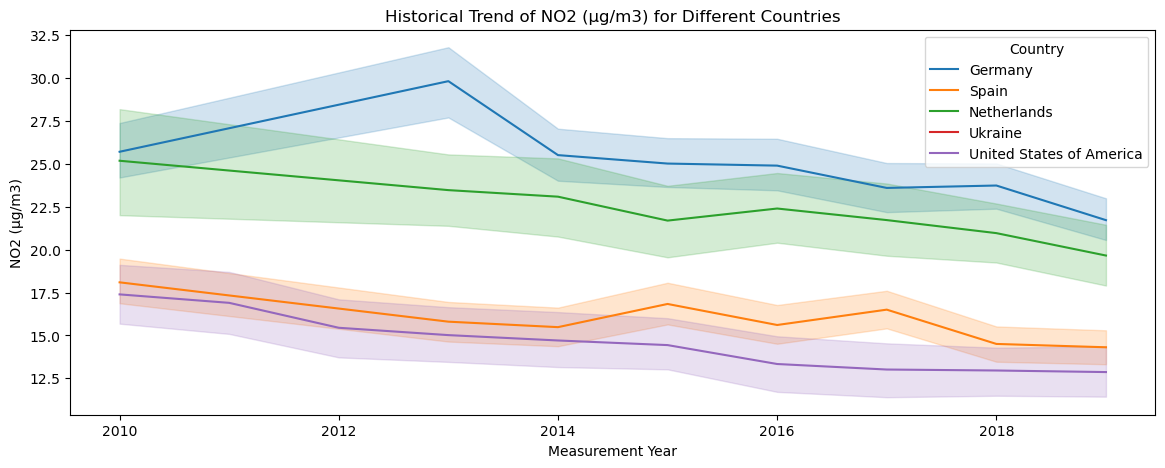

In [276]:
# Filter data for PM2.5 values and countries of interest
countries_of_interest = ['United States of America','Spain', 'Germany', 'Ukraine', 'Netherlands']  # Replace with your countries

pollutant = 'NO2 (μg/m3)'  # Replace with the pollutant of interest

filtered_data = df[df['WHO Country Name'].isin(countries_of_interest)]

# Plotting historical trend for PM2.5 for different countries
plt.figure(figsize=(14, 5))
sns.lineplot(x='Measurement Year', y=pollutant, hue='WHO Country Name', data=filtered_data)
plt.title(f'Historical Trend of {pollutant} for Different Countries')
plt.xlabel('Measurement Year')
plt.ylabel(f'{pollutant}')
plt.legend(title='Country')
plt.show()

C:\Users\shahe\AppData\Local\Temp\ipykernel_22080\3881526037.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


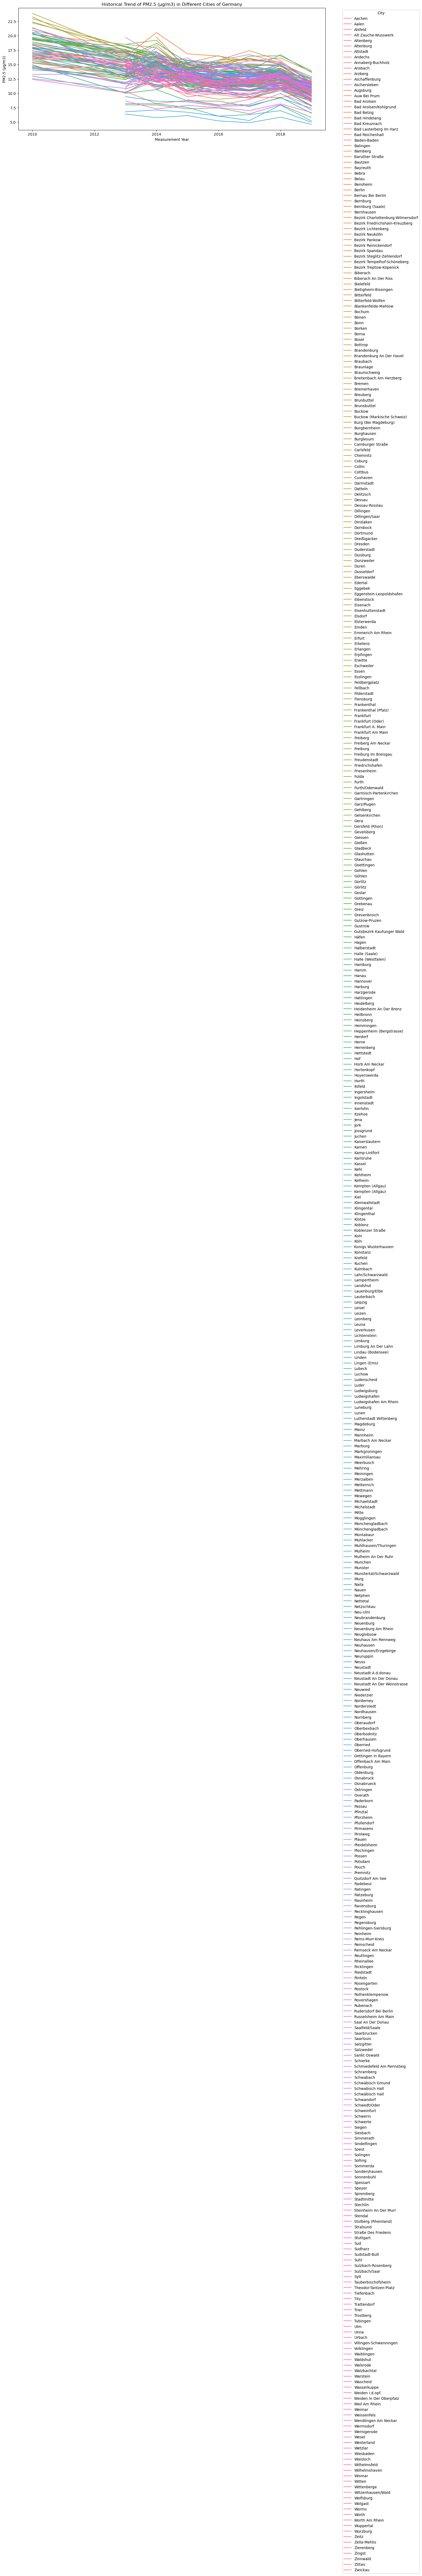

In [277]:
# Replace 'CountryName' with the desired country name
selected_country = 'Germany'

# Filter data for the selected country
country_data = df[df['WHO Country Name'] == selected_country]

# Plotting historical data for different cities in the selected country
plt.figure(figsize=(15, 6))

# Assuming 'date' column is in datetime format already
# Replace 'PM2.5 (μg/m3)' with other columns for different pollutants
pollutant = 'PM2.5 (μg/m3)'  # Replace with the pollutant of interest

sns.lineplot(x='Measurement Year', y=pollutant, hue='City or Locality', data=country_data)
plt.title(f'Historical Trend of {pollutant} in Different Cities of {selected_country}')
plt.xlabel('Measurement Year')
plt.ylabel(f'{pollutant}')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()

In [286]:
country_data['City or Locality'].unique()

array(['Aachen', 'Aalen', 'Alsfeld', 'Alt Zauche-Wusswerk', 'Altenberg',
       'Altenburg', 'Altstadt', 'Andechs', 'Annaberg-Buchholz', 'Ansbach',
       'Arzberg', 'Aschaffenburg', 'Aschersleben', 'Augsburg',
       'Auw Bei Prum', 'Bad Arolsen', 'Bad Arolsen/Kohlgrund',
       'Bad Belzig', 'Bad Hindelang', 'Bad Kreuznach',
       'Bad Lauterberg Im Harz', 'Bad Reichenhall', 'Baden-Baden',
       'Balingen', 'Bamberg', 'Baruther Straße', 'Bautzen', 'Bayreuth',
       'Bebra', 'Belau', 'Bensheim', 'Berlin', 'Bernau Bei Berlin',
       'Bernburg', 'Bernburg (Saale)', 'Bernhausen',
       'Bezirk Charlottenburg-Wilmersdorf',
       'Bezirk Friedrichshain-Kreuzberg', 'Bezirk Lichtenberg',
       'Bezirk Neukölln', 'Bezirk Pankow', 'Bezirk Reinickendorf',
       'Bezirk Spandau', 'Bezirk Steglitz-Zehlendorf',
       'Bezirk Tempelhof-Schöneberg', 'Bezirk Treptow-Köpenick',
       'Biberach', 'Biberach An Der Riss', 'Bielefeld',
       'Bietigheim-Bissingen', 'Bitterfeld', 'Bitterfeld-Wol

In [296]:
# Replace 'SelectedCity' with the desired city name
selected_city = 'Berlin'

# Filter data for the selected city
city_data = df[df['City or Locality'] == selected_city]

city_data.head()

WHO Region ISO3 WHO Country Name City or Locality  \
9890  European Region  DEU          Germany           Berlin   
9891  European Region  DEU          Germany           Berlin   
9892  European Region  DEU          Germany           Berlin   
9893  European Region  DEU          Germany           Berlin   
9894  European Region  DEU          Germany           Berlin   

      Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m3)  \
9890              2010          21.33         28.62        32.89   
9891              2013          16.37         24.08        31.45   
9892              2014          20.55         27.28        31.45   
9893              2015          16.86         23.34        30.49   
9894              2016          16.47         23.16        30.37   

      PM25 temporal coverage (%)  PM10 temporal coverage (%)  \
9890                     97.8765                   97.901143   
9891                         NaN                         NaN   
9892                         NaN                         NaN   
9893                         NaN                         NaN   
9894                         NaN                         NaN   

      NO2 temporal coverage (%)  \
9890                  99.063875   
9891                  98.954766   
9892                  98.969035   
9893                  99.042523   
9894                  99.430072   

                                             Reference  \
9890  European Environment Agency (downloaded in 2021)   
9891  European Environment Agency (downloaded in 2021)   
9892  European Environment Agency (downloaded in 2021)   
9893  European Environment Agency (downloaded in 2021)   
9894  European Environment Agency (downloaded in 2021)   

     Number and type of monitoring stations  Version of the database  Status  
9890          7 rural, 2 suburban, 25 urban                     2022     NaN  
9891                                    NaN                     2022     NaN  
9892                                    NaN                     2022     NaN  
9893                                    NaN                     2022     NaN  
9894                                    NaN                     2022     NaN

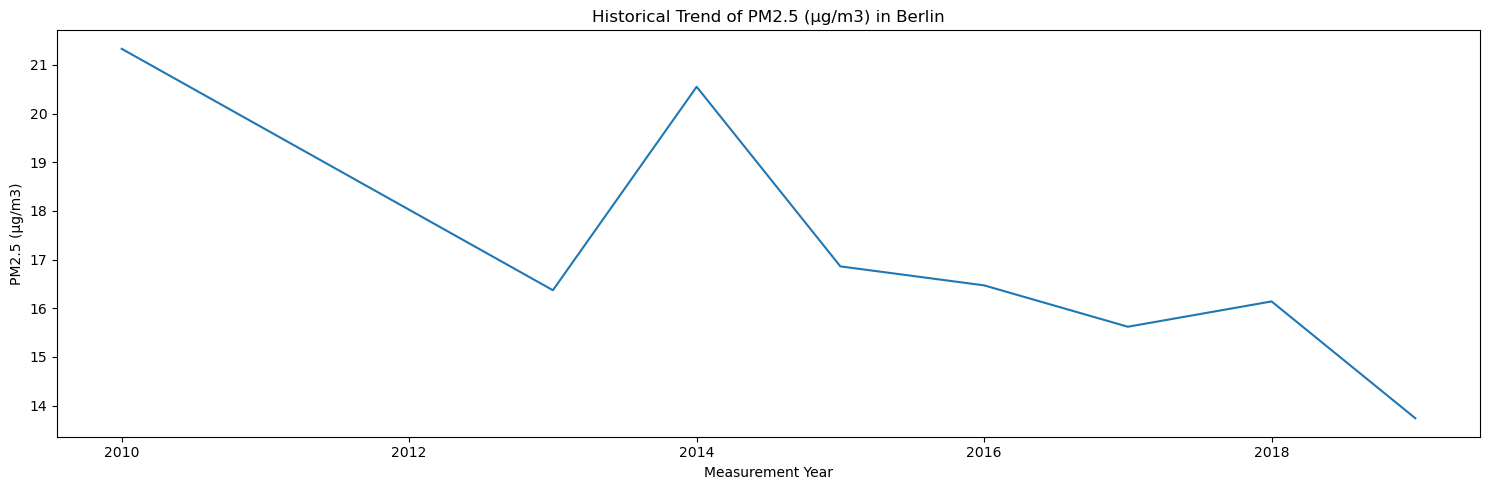

In [299]:
# Plotting historical data for the selected city
plt.figure(figsize=(15, 5))

pollutant = 'PM2.5 (μg/m3)'  # Replace with the pollutant of interest

sns.lineplot(x='Measurement Year', y=pollutant, data=city_data)
plt.title(f'Historical Trend of {pollutant} in {selected_city}')
plt.xlabel('Measurement Year')
plt.ylabel(f'{pollutant}')
plt.tight_layout()
plt.show()

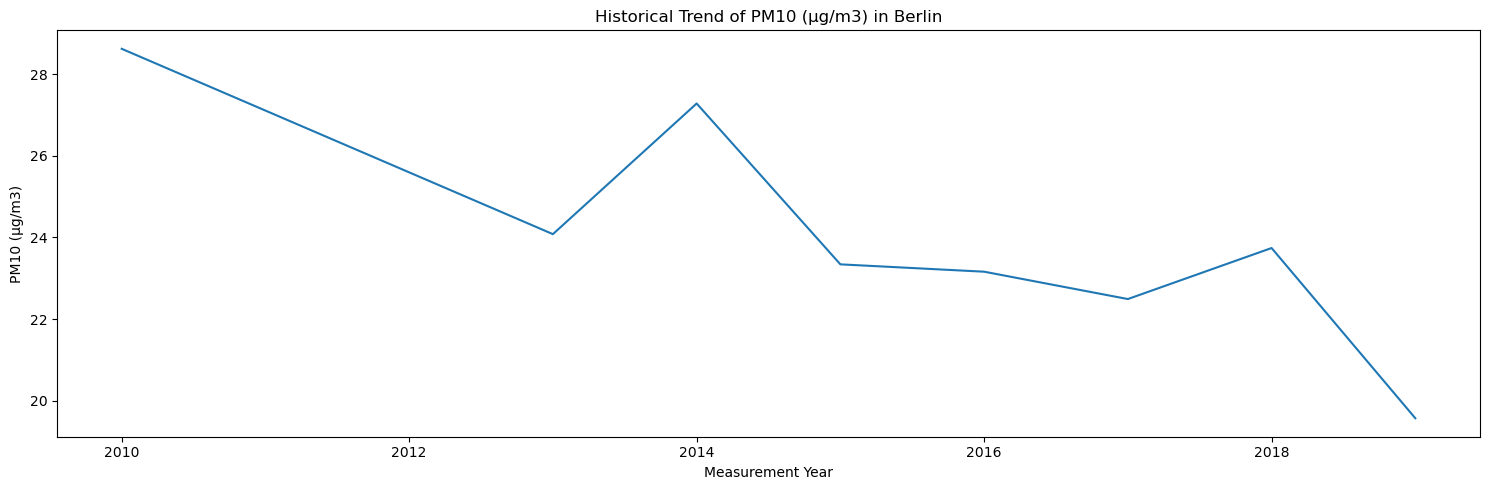

In [300]:
# Plotting historical data for the selected city
plt.figure(figsize=(15, 5))

pollutant = 'PM10 (μg/m3)'  # Replace with the pollutant of interest

sns.lineplot(x='Measurement Year', y=pollutant, data=city_data)
plt.title(f'Historical Trend of {pollutant} in {selected_city}')
plt.xlabel('Measurement Year')
plt.ylabel(f'{pollutant}')
plt.tight_layout()
plt.show()

In [302]:
# Replace 'SelectedCity' with the desired city name
selected_city = 'Munchen'

# Filter data for the selected city
city_data = df[df['City or Locality'] == selected_city]

city_data.head()

WHO Region ISO3 WHO Country Name City or Locality  \
11265  European Region  DEU          Germany          Munchen   
11266  European Region  DEU          Germany          Munchen   
11267  European Region  DEU          Germany          Munchen   
11268  European Region  DEU          Germany          Munchen   
11269  European Region  DEU          Germany          Munchen   

       Measurement Year  PM2.5 (μg/m3)  PM10 (μg/m3)  NO2 (μg/m3)  \
11265              2010          18.50         28.85        56.99   
11266              2013          15.81           NaN          NaN   
11267              2014          13.58         20.82        44.80   
11268              2015          13.45         21.29        45.74   
11269              2016          12.31         19.77        43.26   

       PM25 temporal coverage (%)  PM10 temporal coverage (%)  \
11265                      92.643                      99.388   
11266                         NaN                         NaN   
11267                         NaN                         NaN   
11268                         NaN                         NaN   
11269                         NaN                         NaN   

       NO2 temporal coverage (%)  \
11265                  98.858333   
11266                        NaN   
11267                  98.228311   
11268                  98.828767   
11269                  99.009563   

                                              Reference  \
11265  European Environment Agency (downloaded in 2021)   
11266  European Environment Agency (downloaded in 2021)   
11267  European Environment Agency (downloaded in 2021)   
11268  European Environment Agency (downloaded in 2021)   
11269  European Environment Agency (downloaded in 2021)   

      Number and type of monitoring stations  Version of the database  Status  
11265                   2 suburban, 11 urban                     2022     NaN  
11266                                    NaN                     2022     NaN  
11267                                    NaN                     2022     NaN  
11268                                    NaN                     2022     NaN  
11269                                    NaN                     2022     NaN

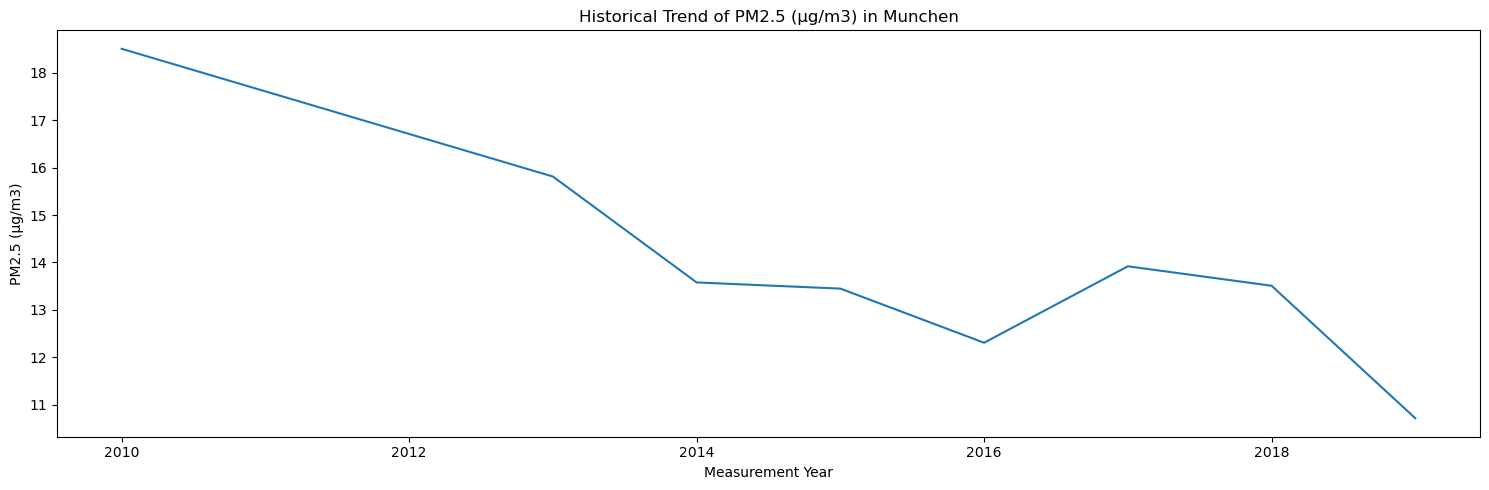

In [303]:
# Plotting historical data for the selected city
plt.figure(figsize=(15, 5))

pollutant = 'PM2.5 (μg/m3)'  # Replace with the pollutant of interest

sns.lineplot(x='Measurement Year', y=pollutant, data=city_data)
plt.title(f'Historical Trend of {pollutant} in {selected_city}')
plt.xlabel('Measurement Year')
plt.ylabel(f'{pollutant}')
plt.tight_layout()
plt.show()

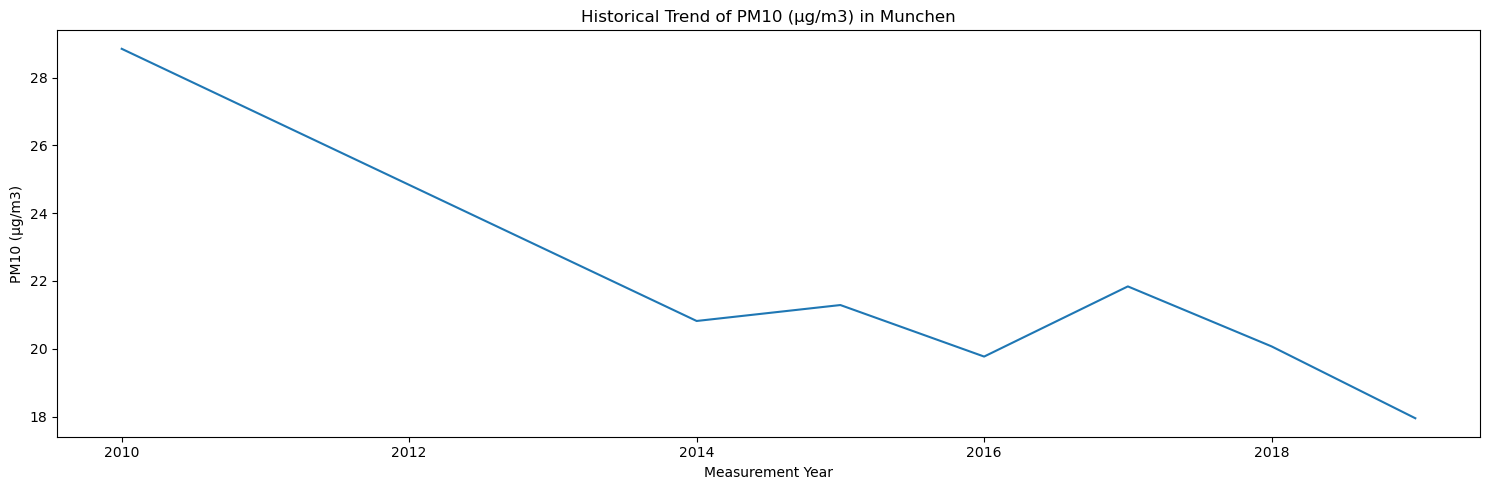

In [304]:
# Plotting historical data for the selected city
plt.figure(figsize=(15, 5))

pollutant = 'PM10 (μg/m3)'  # Replace with the pollutant of interest

sns.lineplot(x='Measurement Year', y=pollutant, data=city_data)
plt.title(f'Historical Trend of {pollutant} in {selected_city}')
plt.xlabel('Measurement Year')
plt.ylabel(f'{pollutant}')
plt.tight_layout()
plt.show()